In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Lets create synthetic data points
from sklearn.datasets import make_regression

In [3]:
X,y = make_regression(n_samples = 1000, n_features = 2, n_targets = 1, noise = 3.0)

In [4]:
X

array([[ 1.16420642, -0.01133047],
       [-0.56366132, -1.22135326],
       [ 0.51683038, -0.72827924],
       ...,
       [-0.19031161,  1.10969447],
       [-0.43508931,  0.44878356],
       [ 0.30165207,  0.3094172 ]])

In [5]:
y

array([ 2.86588524e+01, -1.29924460e+02, -5.38412778e+01,  4.98912251e+01,
       -4.08361137e+01,  1.40743996e+02, -3.88760038e+01, -9.64072960e+01,
       -1.07718961e+02, -6.92362354e+01,  1.12245457e+02,  1.63424300e+02,
        8.42394212e+01, -1.45972924e+02,  1.90493201e+01,  5.37290950e+01,
       -6.51357665e+01,  2.81432685e+01, -2.14975585e+02, -1.08722146e+02,
        6.59127377e+01,  6.74329785e+01, -1.69012281e+02,  4.77821341e+00,
       -7.18453220e+01, -1.70268536e+02, -5.98314075e+01, -9.44904071e+00,
        1.98736484e+00, -9.15530775e+01,  8.73710271e+00, -3.10630523e+01,
       -5.37469962e+01,  4.49798416e+00, -3.34159622e+01, -7.59018157e+01,
       -1.99174180e+02,  1.46887496e+01,  1.20348260e+02, -1.33966528e+02,
        1.01972751e+02, -7.44249193e+01,  2.85005757e+01, -7.88988709e+01,
       -2.99353941e+01,  6.53142027e+01,  6.83513960e+01, -1.37169077e+02,
        1.09250724e+02, -2.14905981e+01,  6.03800021e+00,  6.64372431e+01,
        1.50107689e+01, -

In [6]:
pd.DataFrame(X)[0]

0      1.164206
1     -0.563661
2      0.516830
3      0.319247
4      0.044744
         ...   
995   -0.528350
996    1.915066
997   -0.190312
998   -0.435089
999    0.301652
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

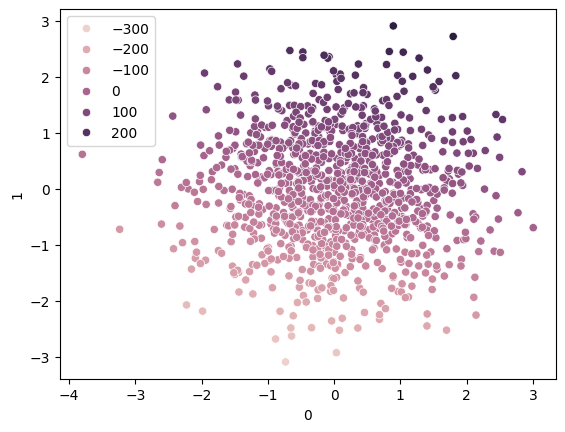

In [7]:
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1], hue = y)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [9]:
from sklearn.svm import SVR

In [10]:
svr = SVR(kernel = 'linear')

In [11]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [12]:
svr.coef_

array([[24.1661209 , 91.37298756]])

In [13]:
## Prediction
y_pred = svr.predict(X_test)

In [14]:
y_pred

array([ 1.20469652e+02, -1.13836496e-01, -3.46217114e+01, -8.78467299e+01,
       -3.28723788e+01, -1.82628751e+01,  2.04337741e+01,  1.22964570e+02,
        1.61317083e+02, -3.27707774e+01,  1.30419439e+02,  4.17620016e+01,
       -2.55412517e+02,  2.48294923e+00,  4.93099352e+01,  1.42072872e+02,
       -5.35061904e+01, -7.09744646e+00, -7.30748649e+01,  9.38633156e+00,
        1.29132895e+02, -3.72514652e+01,  1.00345918e+02,  7.53597739e+01,
        1.64946613e+02, -6.63351726e+01,  8.30182301e+01,  5.62427795e+01,
        1.18927166e+02,  1.20204323e+02, -5.45119770e+01, -1.87207617e+01,
       -5.85329652e+00, -3.77873264e+01, -1.30496252e+02, -1.47996548e+01,
       -3.67397740e+01, -1.00180018e+01, -8.49755055e+01, -3.81929785e+01,
       -1.32849117e+01, -1.42937587e+02,  1.09816158e+01,  5.79363209e+01,
        4.87780779e+01, -2.66701726e+01,  3.78073224e+01,  2.96208815e+01,
       -8.80264220e+01,  1.63929253e+02, -1.07091708e+01,  1.72306086e+02,
        3.88971284e+01,  

In [15]:
from sklearn.metrics import r2_score

In [16]:
print(r2_score(y_test, y_pred))

0.9988645951451005


Hyperparameter Tuning with SVR

In [17]:
from sklearn.model_selection import GridSearchCV

## defining parameter range
param_grid = {
    'C' : [0.1, 1, 10, 100, 1000],
    'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel' : ['linear'],
    'epsilon' : [0.1, 0.2, 0.3]
}

In [18]:
grid = GridSearchCV(SVR(), param_grid = param_grid, refit = True, cv = 5, verbose = 3)

In [19]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.762 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.766 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.752 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.780 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.762 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.766 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.753 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.752 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [20]:
grid.best_params_

{'C': 1000, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [21]:
## Prediction
y_pred4 = grid.predict(X_test)
print(r2_score(y_test, y_pred4))

0.9988948381456357
